In [1]:
import pandas as pd #data processing 
import numpy as np #linear algebra
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'forest fires in brazil.csv',encoding='latin1')

In [4]:
#checking first 10 rows

df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [5]:
#checking more info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
#checking if there are any missing values, the same can be obtained from df.info()

df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
#we will  drop the data column

df.drop(["date"],axis=1, inplace=True)

In [8]:
#We will see the unique list of months

df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [9]:
#unique states

states =df.state.unique()
states

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [10]:
#unique years

years= df.year.unique()
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [13]:
#From the list years, see the number of times years[0] .i.e year 1998 has occurred 

year_info = df[df.year == years[0]]
print(len(year_info))
year_info.head(12)


324


,year,state,month,number
0,1998,Acre,Janeiro,0.0
20,1998,Acre,Fevereiro,0.0
40,1998,Acre,Março,0.0
60,1998,Acre,Abril,0.0
80,1998,Acre,Maio,0.0
100,1998,Acre,Junho,3.0
120,1998,Acre,Julho,37.0
140,1998,Acre,Agosto,130.0
160,1998,Acre,Setembro,509.0
180,1998,Acre,Outubro,44.0


In [14]:
#Now create a loop to check how many number of times fires have occurred in respective states

single_year_state = []

for state in states:
    state_name = state
    count_fire = year_info[year_info['state'] == state].number.sum()
    obj = {"state":state_name, "count_fire":count_fire}
    single_year_state.append(obj)

In [15]:
single_year_state 

[{'state': 'Acre', 'count_fire': 730.0},
 {'state': 'Alagoas', 'count_fire': 86.0},
 {'state': 'Amapa', 'count_fire': 278.0},
 {'state': 'Amazonas', 'count_fire': 946.0},
 {'state': 'Bahia', 'count_fire': 1224.6870000000001},
 {'state': 'Ceara', 'count_fire': 1612.0140000000001},
 {'state': 'Distrito Federal', 'count_fire': 103.0},
 {'state': 'Espirito Santo', 'count_fire': 218.0},
 {'state': 'Goias', 'count_fire': 750.1189999999999},
 {'state': 'Maranhao', 'count_fire': 365.884},
 {'state': 'Mato Grosso', 'count_fire': 2401.389},
 {'state': 'Minas Gerais', 'count_fire': 1233.074},
 {'state': 'Pará', 'count_fire': 715.586},
 {'state': 'Paraiba', 'count_fire': 816.0},
 {'state': 'Pernambuco', 'count_fire': 767.0},
 {'state': 'Piau', 'count_fire': 1493.577},
 {'state': 'Rio', 'count_fire': 1149.0},
 {'state': 'Rondonia', 'count_fire': 916.0070000000001},
 {'state': 'Roraima', 'count_fire': 21.0},
 {'state': 'Santa Catarina', 'count_fire': 59.0},
 {'state': 'Sao Paulo', 'count_fire': 3196

In [16]:
#create a dataframe from the single_year_state dictionary

year_state_df = pd.DataFrame(single_year_state)
year_state_df

,count_fire,state
0,730.000,Acre
1,86.000,Alagoas
2,278.000,Amapa
3,946.000,Amazonas
4,1224.687,Bahia
5,1612.014,Ceara
6,103.000,Distrito Federal
7,218.000,Espirito Santo
8,750.119,Goias
9,365.884,Maranhao


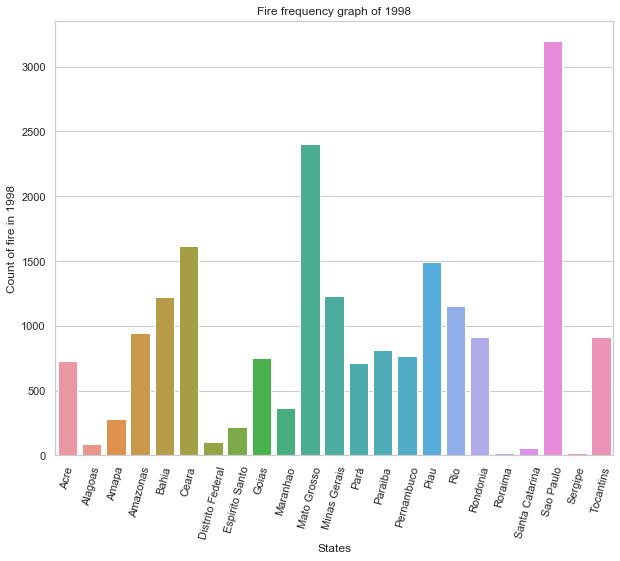

In [18]:
#plot fire frequency for the year 1998

import seaborn as sns

plt.figure(figsize=(10,8))
sns.set(style = 'whitegrid')

ax = sns.barplot(x="state",y="count_fire",data=year_state_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

plt.xlabel("States")
plt.ylabel("Count of fire in 1998")

plt.title("Fire frequency graph of 1998")
plt.show()

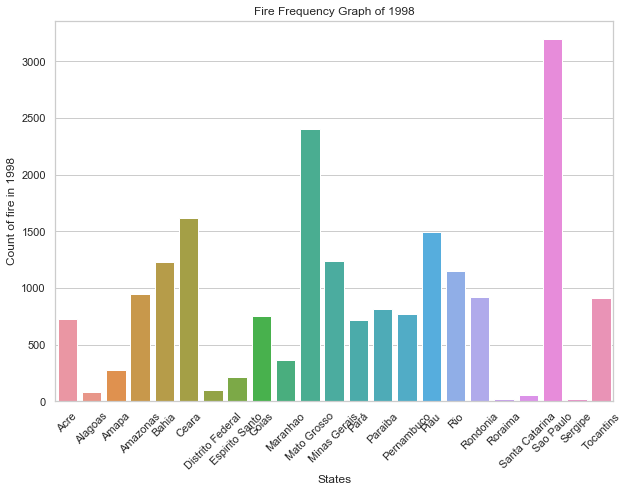

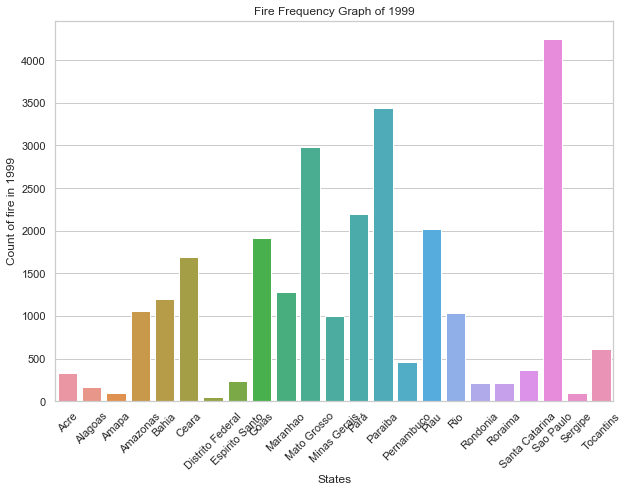

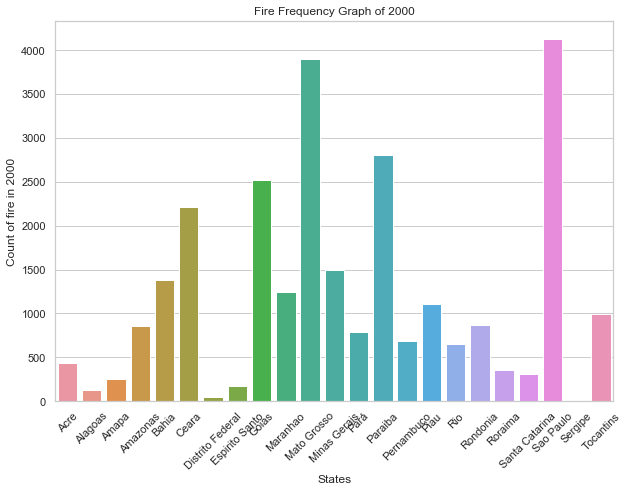

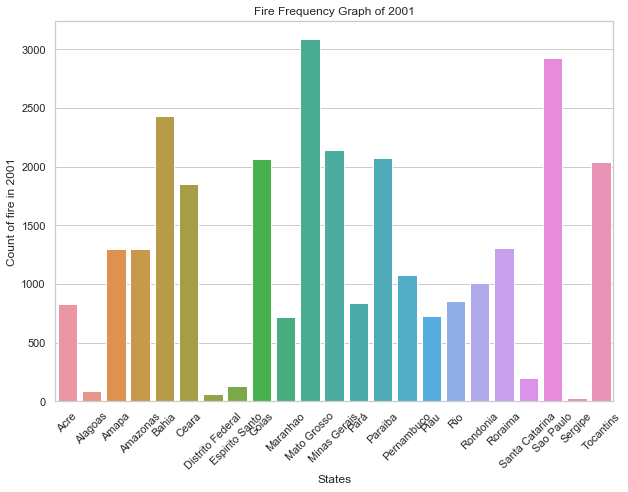

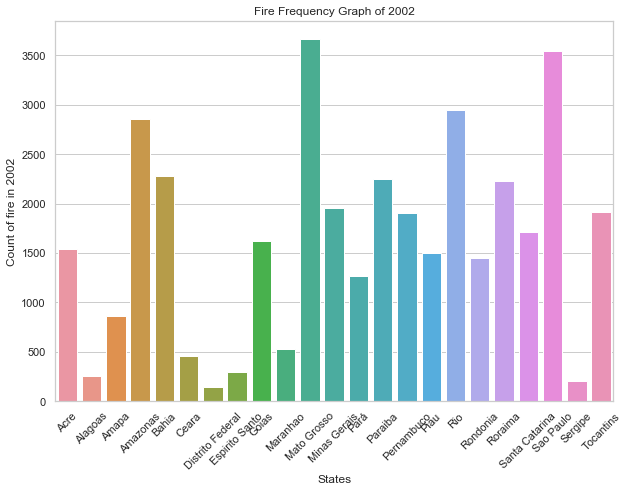

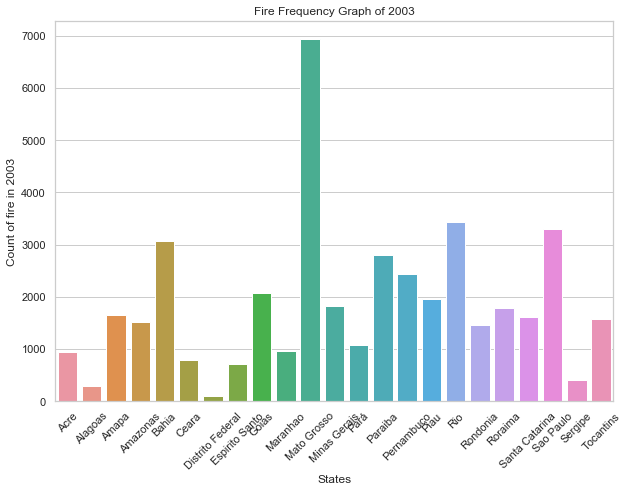

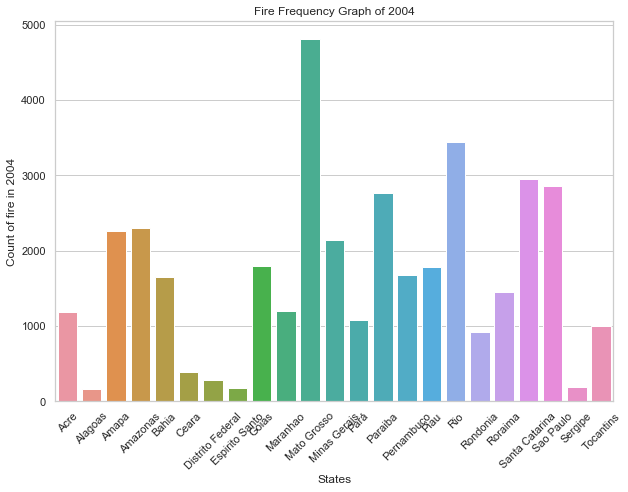

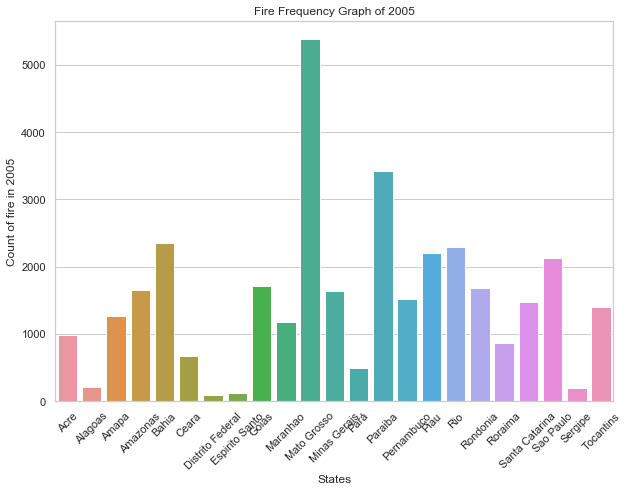

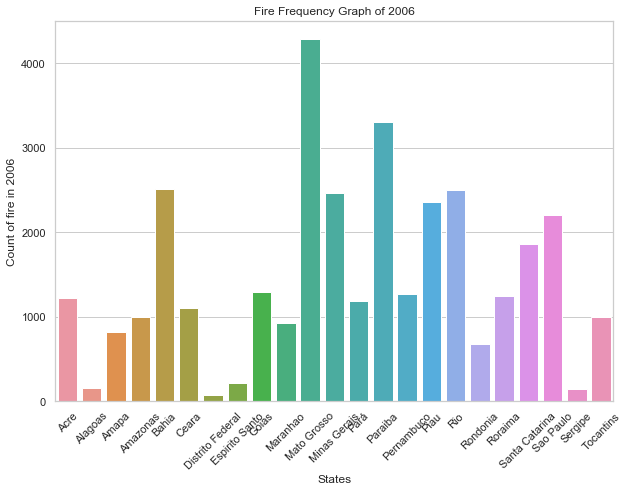

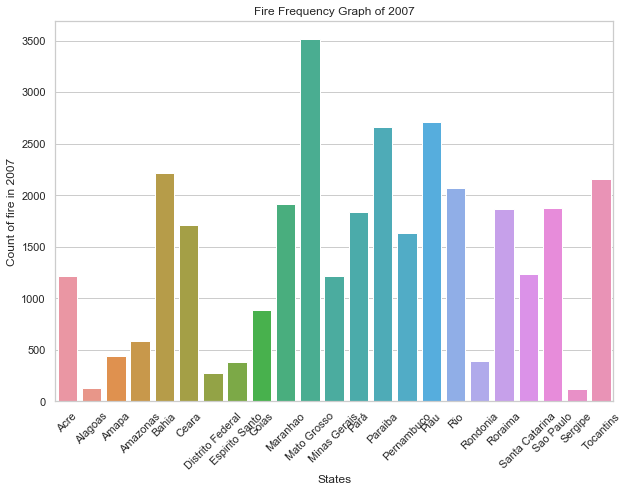

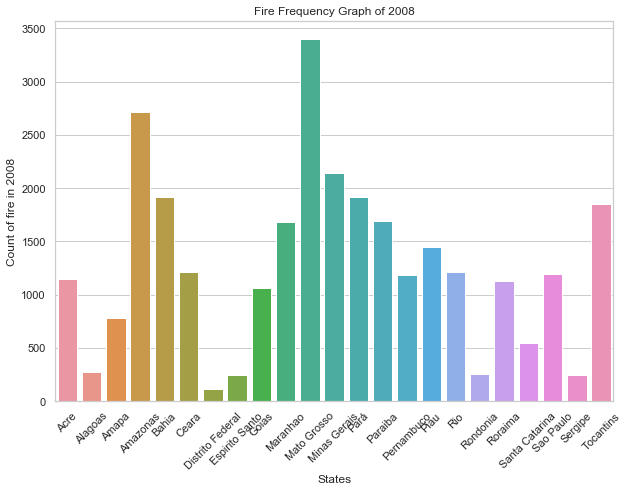

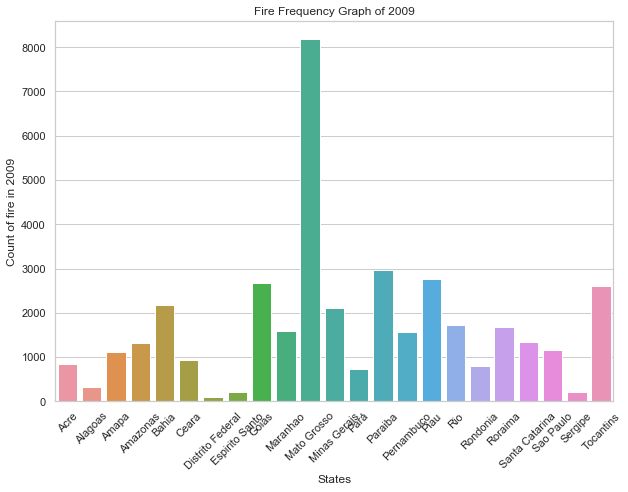

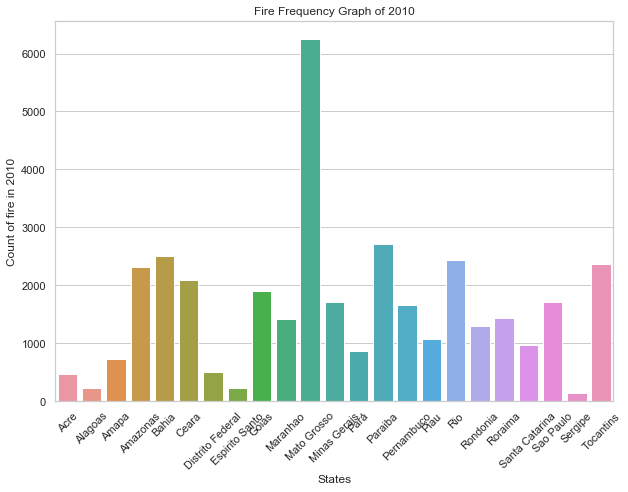

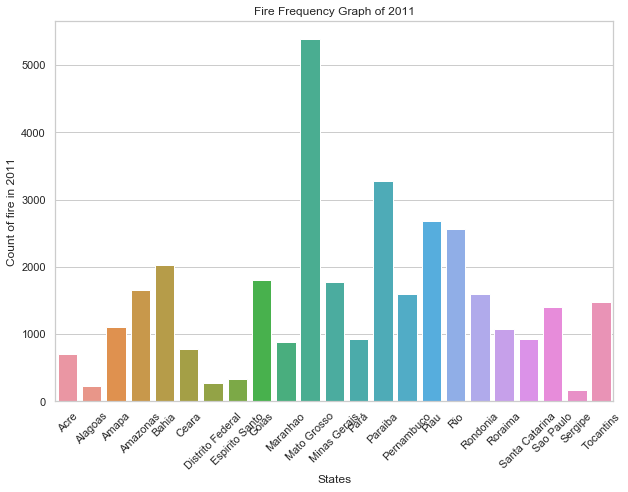

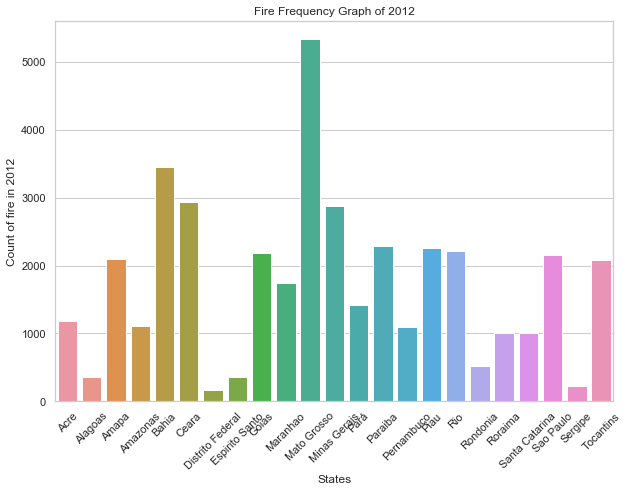

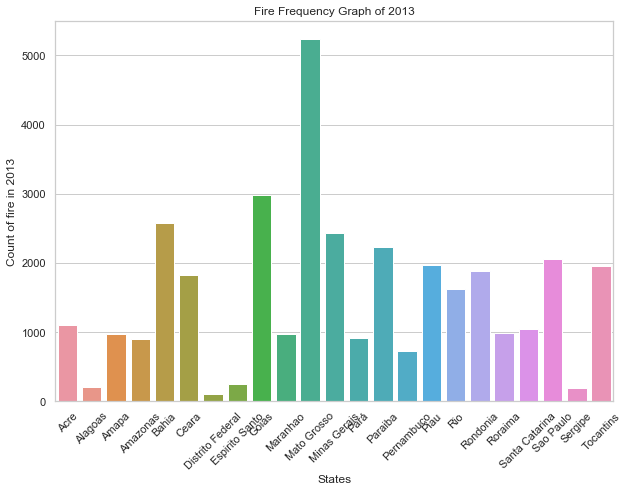

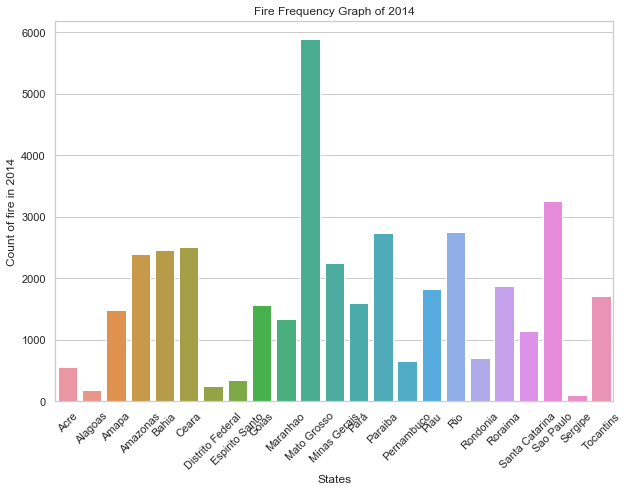

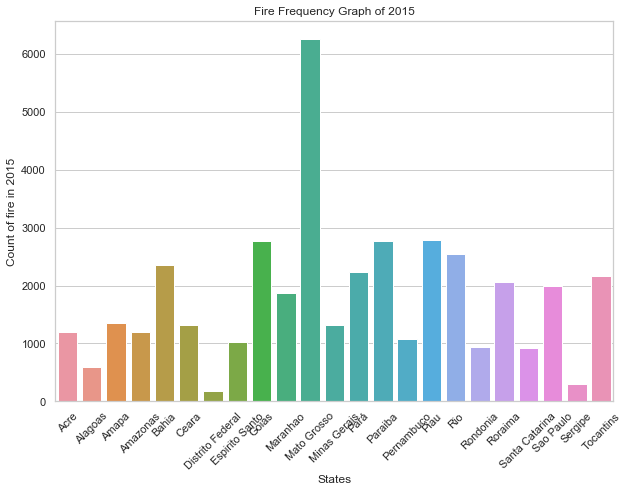

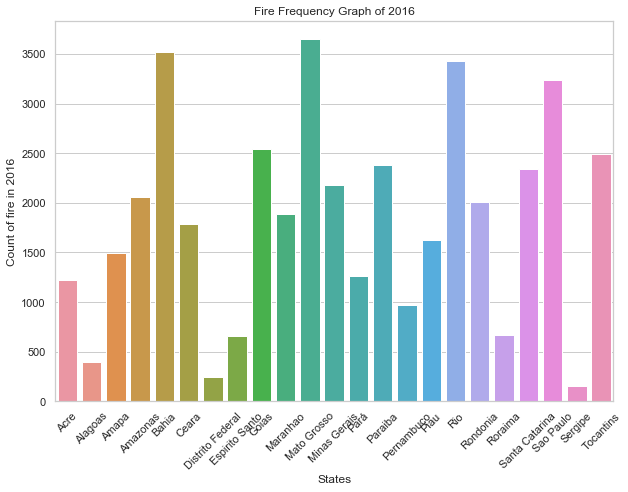

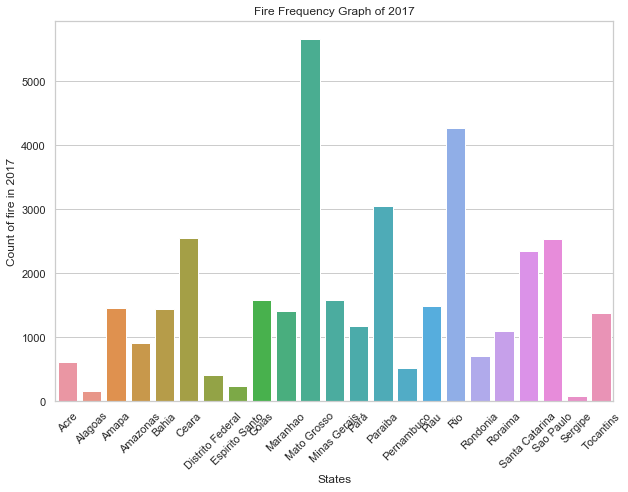

In [19]:
#year vs state fire count

for year in years:
    year_info = df[df["year"] == year]
    states = year_info['state'].unique()

    single_year_state = []

    for state in states:
        state_name = state
        count_fire = year_info[year_info['state'] == state].number.sum()
        obj = {"state":state_name, "count_fire":count_fire}
        single_year_state.append(obj)

    year_state_df = pd.DataFrame(single_year_state)

    plt.figure(figsize=(10,7))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="state",y="count_fire",data=year_state_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.xlabel("States")
    plt.ylabel("Count of fire in {0}".format(year))
    plt.title("Fire Frequency Graph of {0}".format(year))
    plt.show()

In [20]:
df['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

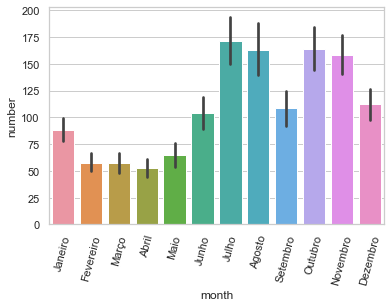

In [21]:
sns.barplot(x="month", y="number", data=df,
           order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
plt.xticks(rotation=75)
plt.show()

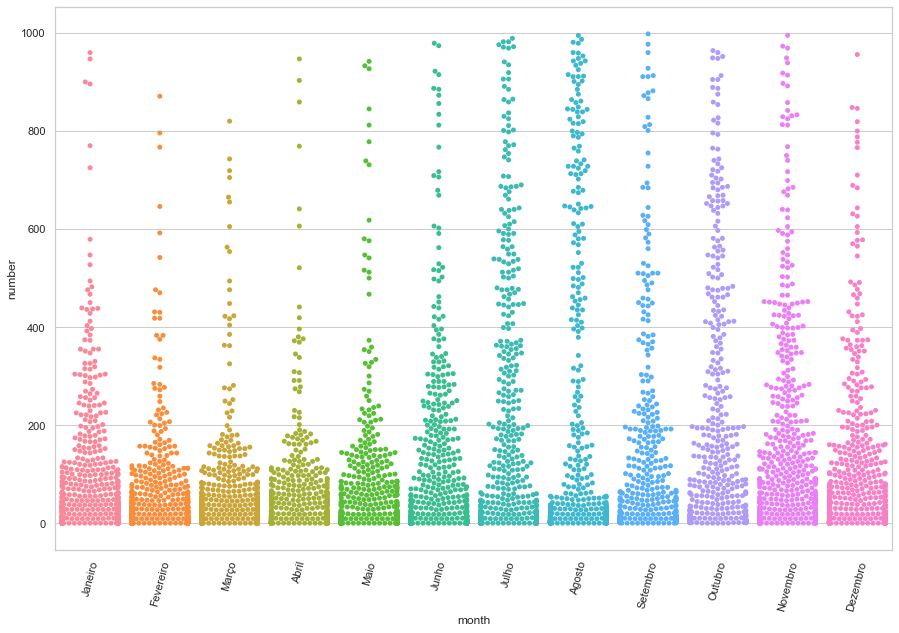

In [22]:
plt.figure(figsize=(15,10))
sns.swarmplot(x="month", y="number", data=df)
plt.xticks(rotation=75)
plt.show()

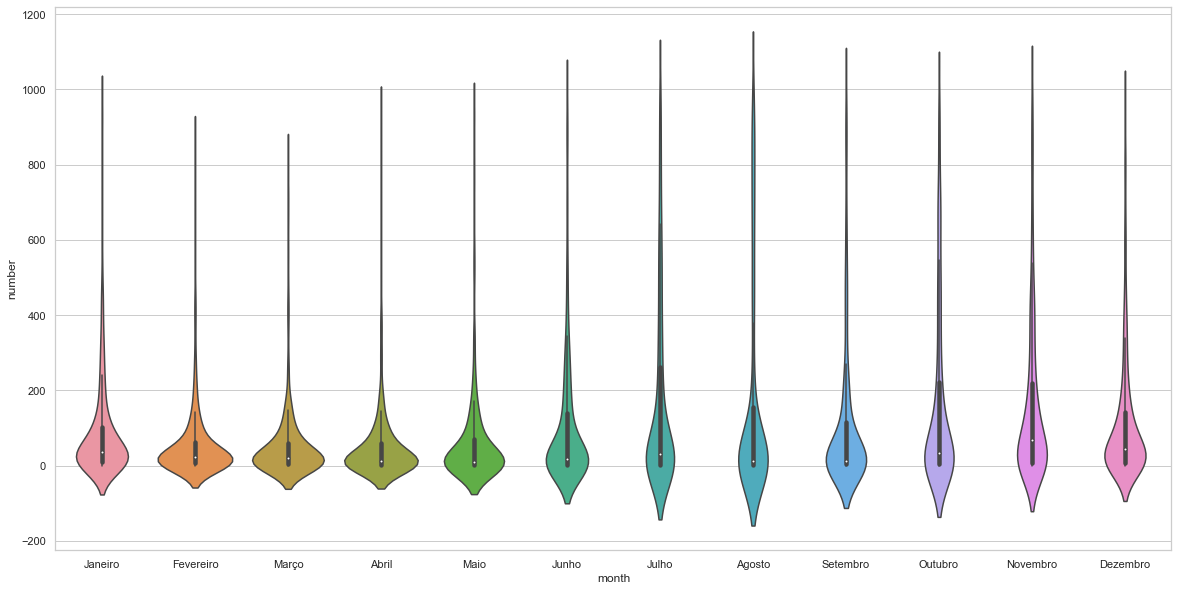

In [23]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x="month", y="number", data=df)
plt.show()

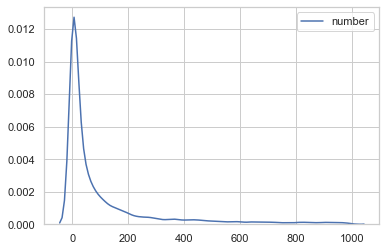

In [29]:
#ax=df.number.plot.kde()

sns.kdeplot(df['number'])


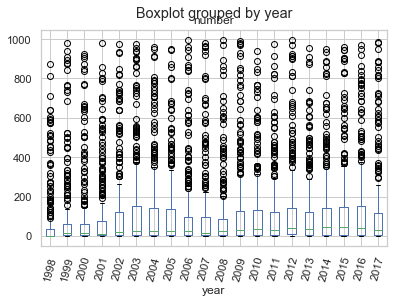

In [30]:
df.boxplot(column="number",by="year")
plt.xticks(rotation=75)
plt.show()